In [ ]:
#SVM-Example-DiscriWinston

In [12]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [16]:
#Read the file
mydata=pd.read_csv("DiscriWinston.csv")
mydata.head()

,Person,Income,InvestAmt,WSJSubscriber,Zscore,Prediction,Unnamed: 6,Unnamed: 7,Unnamed: 8,a1,a2,Unnamed: 11,Unnamed: 12
0,1,66.4,26.9,No,1.707565,No,NaN,NaN,Z,-0.022090802,0.118007213,NaN,NaN
1,2,68.0,7.1,No,-0.664323,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,54.9,21.5,No,1.324370,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,50.6,19.3,No,1.159745,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,54.1,16.7,No,0.775608,No,NaN,NaN,NaN,Income,InvestAmt,NaN,NaN


In [17]:
#Convert Target Group Variable into 0/1 format
mydata["WSJSubscriber"]=(mydata["WSJSubscriber"]=="Yes").astype(int)

In [18]:
#Define X and Y
X=mydata.iloc[:,1:3]
Y=mydata["WSJSubscriber"]

In [48]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="rbf",C=10, gamma=1,probability=True)
SVM1=svc_model.fit(X,Y)
SVM1
SVM1.decision_function(X)

array([-0.99996732, -0.9998329 , -0.9999523 , -0.99995149, -0.99983757,
       -1.00020562, -0.99983197, -0.99979139, -0.99984069, -1.00023688,
       -1.00011586, -0.99968673, -1.00026085, -0.99983271, -1.00018725,
       -0.99998654, -1.00045693, -1.00018725, -1.00036911, -1.00035338,
       -0.99992306, -0.99983271, -1.0001839 , -0.99981704, -1.00023968,
       -0.9998195 , -0.99977066, -0.9998249 , -1.00019325, -0.99981704,
       -1.00007775, -0.99984069, -0.99998999, -1.00042894, -0.99983271,
       -0.99995303, -0.99981884, -1.00019325, -0.99998999, -1.00025974,
       -0.99977678, -1.00043502, -1.00012263, -1.00014362, -0.99974273,
       -0.99983757, -0.99982494, -0.99985785, -1.00018389, -0.99981884,
       -0.99981405, -1.00067145, -1.00049024, -0.99985188, -0.99977036,
       -0.99977679, -1.00011586,  1.00014642,  1.00003369,  0.999791  ,
        0.99990202,  0.99979438,  1.0001608 ,  1.0001437 ,  1.00019514,
        1.00016276,  1.00010356,  1.00001794,  1.00001794,  1.00

In [49]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X)
print("Accuracy=","{:.4f}".format(accuracy_score(Y,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y,Prediction)))

Accuracy= 1.0000
Recall= 1.0000
Precision 1.0000


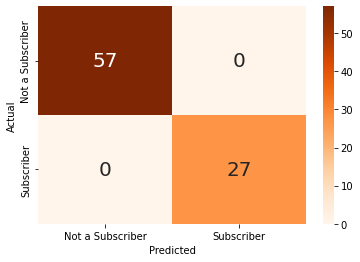

In [47]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},
           xticklabels=["Not a Subscriber","Subscriber"],
           yticklabels=["Not a Subscriber","Subscriber"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [50]:
#Getting Probabilities
Probability=SVM1.predict_proba(X)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,0.930027,0.069973
1,0.930001,0.069999
2,0.930024,0.069976
3,0.930024,0.069976
4,0.930002,0.069998
...,...,...
79,0.040816,0.959184
80,0.040796,0.959204
81,0.040796,0.959204
82,0.040797,0.959203


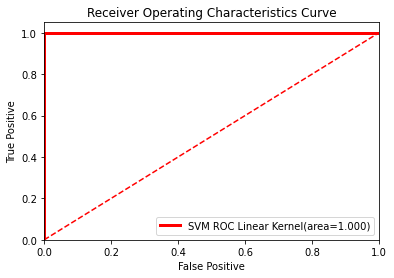

In [51]:
#ROC Curve
svmroc=roc_auc_score(Y,Prediction)
fpr,tpr,thresholds=roc_curve(Y,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()